# Linear Algebra
Although its name may sound harmless, Linear Algebra is by no means a trivial branch of mathematics, and the deeper you dive into Data Science and Statistics, the more often you will encounter its concepts.  In this exercise, we'll start with some basic operations on matrices and vectors, then move onto Eigenvalues and Eigenvectors, and conclude with some Matrix Decompositions.

## Vectors and Matrices
1. (1) Create a $2\times2$ matrix $\textbf{A}$ and a column vector $\vec{v}$.  Now compute the matrix products $\textbf{A}\vec{v}$ and $\vec{v}\textbf{A}$.  Did both operations work?  Why or why not?
1. (2) Using $\vec{v}$ above, compute the inner, or dot, product, $\vec{v} \cdot \vec{v}$.  Is this quantity reminiscent of another vector quantity?

In [1]:
import numpy as np
import numpy.linalg as LA

In [2]:
u_row = np.array([5,6])
u_row
np.dot(u_row, u_row)

array([5, 6])

61

In [3]:
A = np.array([[1, 2], [3, 4]])
A
u_col = np.array([[5], [6]])
#u_col = u_col.T
u_col
A.dot(u_col) # works as matmult 2x2 and 2x1
# u_col.dot(A) fails as trying to matmult 2x1 and 2x2
np.dot(u_col.flatten(), u_col.flatten()) #both need to be row vectors first, give same as norm squared 
LA.norm(u_col) ** 2

array([[1, 2],
       [3, 4]])

array([[5],
       [6]])

array([[17],
       [39]])

61

60.999999999999993

In [4]:
A = np.array([[1, 2], [3, 4]])
C = np.array([[1, 2, 3], [4, 5, 6]])

A*A              # ** on ndarray this does elementwise **
np.dot(A, A)     # this does matrix multiplication

#A*C             # ** doesn't work with ndarray as it is looking for an element-wise match **

A.dot(C)         # these four all give the same result, matrix multiplication
np.dot(A,C)
np.matmul(A,C)
A@C

array([[ 1,  4],
       [ 9, 16]])

array([[ 7, 10],
       [15, 22]])

array([[ 9, 12, 15],
       [19, 26, 33]])

array([[ 9, 12, 15],
       [19, 26, 33]])

array([[ 9, 12, 15],
       [19, 26, 33]])

array([[ 9, 12, 15],
       [19, 26, 33]])

In [5]:
A = np.matrix([[1, 2], [3, 4]])
C = np.matrix([[1, 2, 3], [4, 5, 6]])


A*A              # ** on matrix this does matrix multiplication **
np.dot(A, A)     # this also does matrix multiplication

A*C              # ** works with matrix as it is looking for alignment for matmul

A.dot(C)         # these four all give the same result, matrix multiplication
np.dot(A,C)
np.matmul(A,C)
A@C

matrix([[ 7, 10],
        [15, 22]])

matrix([[ 7, 10],
        [15, 22]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

1. (3) Create 3 matrices $\textbf{A}$, $\textbf{B}$, $\textbf{C}$ of dimension $2\times2$, $3\times2$, and $2\times3$ respectively such that $$\textbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \textbf{B} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6\end{bmatrix} \textbf{C} = \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{bmatrix}$$ and perform the following multiplications, stating the final dimensions of each: $\textbf{AA}$, $\textbf{AB}$, $\textbf{AC}$, $\textbf{BB}$, $\textbf{BA}$, $\textbf{BC}$, $\textbf{CC}$, $\textbf{CA}$, $\textbf{CB}$.  Comment on your results.

In [6]:
A = np.matrix([[1, 2], [3, 4]])
A
B = np.matrix([[1, 2], [3, 4], [5, 6]])
C = np.matrix([[1, 2, 3], [4, 5, 6]])
np.dot(A, A)
#np.dot(A, B)
A*C              # if we used array rather than matrix this doesn't work as will look for elementwise
#np.dot(B, B)
np.matmul(B, A)
np.dot(B, C)
#np.dot(C, C)
#np.dot(C, A)
np.dot(C, B)

matrix([[1, 2],
        [3, 4]])

matrix([[ 7, 10],
        [15, 22]])

matrix([[ 9, 12, 15],
        [19, 26, 33]])

matrix([[ 7, 10],
        [15, 22],
        [23, 34]])

matrix([[ 9, 12, 15],
        [19, 26, 33],
        [29, 40, 51]])

matrix([[22, 28],
        [49, 64]])

In [7]:
A
B

matrix([[1, 2],
        [3, 4]])

matrix([[1, 2],
        [3, 4],
        [5, 6]])

1. (4) Using $\textbf{A}$ and $\textbf{B}$ above, compute $(\textbf{BA})^T$ and $\textbf{A}^T \textbf{B}^T$.  What can you say about your results?

In [8]:
B@A
(B@A).T
A.T@B.T
"transpose is reverse commutative across matmul"

matrix([[ 7, 10],
        [15, 22],
        [23, 34]])

matrix([[ 7, 15, 23],
        [10, 22, 34]])

matrix([[ 7, 15, 23],
        [10, 22, 34]])

'transpose is reverse commutative across matmul'

In [9]:
A
B
C

matrix([[1, 2],
        [3, 4]])

matrix([[1, 2],
        [3, 4],
        [5, 6]])

matrix([[1, 2, 3],
        [4, 5, 6]])

1. (5) Using $\textbf{A}$, $\textbf{B}$, and $\textbf{C}$ above, compute the following sums: $\textbf{A+A}$, $\textbf{A+B}$, $\textbf{A+C}$, $\textbf{B+B}$, $\textbf{B+A}$, $\textbf{B+C}$, $\textbf{C+C}$, $\textbf{C+A}$, $\textbf{C+B}$.  Comment on your results.

In [10]:
A + A
#A + B
#A + C
#B + C
#B + A
B + B
C + C
#C + A
#C + B
# dim must be equal to do matrix addition

matrix([[2, 4],
        [6, 8]])

matrix([[ 2,  4],
        [ 6,  8],
        [10, 12]])

matrix([[ 2,  4,  6],
        [ 8, 10, 12]])

1. (6) Construct three matrices $\textbf{I}_A$, $\textbf{I}_B$, and $\textbf{I}_C$ such that $\textbf{I}_A\textbf{A} = \textbf{A}$, $\textbf{I}_B\textbf{B} = \textbf{B}$, and $\textbf{I}_C\textbf{C} = \textbf{C}$.
1. (7) Construct three matrices $\textbf{A}^{-1}$, $\textbf{B}^{-1}$, and $\textbf{C}^{-1}$ such that $\textbf{A}^{-1}\textbf{A} = \textbf{I}_A$, $\textbf{B}^{-1}\textbf{B} = \textbf{I}_B$, and $\textbf{C}^{-1}\textbf{C} = \textbf{I}_C$.  Comment on your results. **Hint** This may not always be possible!
1. (8) Using $\textbf{A}^{-1}$ compute $(\textbf{A}^{-1})^T$ and comment on your results.

In [11]:
#I_A = np.identity(A.shape[0]) # identify = eye and allows get I without having to look or fix dim of A

I_A = np.eye(2)
I_A@A
I_B = np.eye(3)
I_B@B
I_C = np.eye(2)
I_C@C

LA.inv(A)@A
# LA.inv(B)@B                # B not invertible (not sqaure)
# LA.inv(C)@C                # C not inverticle (not square)

LA.inv(A)
(LA.inv(A)).T
A.T
LA.inv(LA.inv(A).T)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

matrix([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.]])

matrix([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

matrix([[  1.00000000e+00,   4.44089210e-16],
        [  0.00000000e+00,   1.00000000e+00]])

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

matrix([[-2. ,  1.5],
        [ 1. , -0.5]])

matrix([[1, 3],
        [2, 4]])

matrix([[ 1.,  3.],
        [ 2.,  4.]])

1. (9) Using $\textbf{A}$, $\textbf{B}$, and $\textbf{C}$, compute the determinant of each.  Comment on your results.

In [12]:
LA.det(A)
# LA.det(B)     no determinate if not square
# LA.det(C)     no determinate if not square

-2.0000000000000004

1. (10) Construct a square ($2\times2$) matrix, $\textbf{D}$,that is not invertible.

In [13]:
D = np.matrix([[1, 0], [1, 0]])
D
LA.inv(D)

matrix([[1, 0],
        [1, 0]])

LinAlgError: Singular matrix

In [ ]:
A

1. (11) How would you go about solving the equation $\textbf{A}\vec{x} = 0$, using $\textbf{A}$ as above for an unknown $\vec{x}$?  Do so and comment on your results.  **Hint** consider parts (6) and (7).
1. (12) Using the same method as in part (11), solve the equation $\textbf{A}\vec{x} = \vec{y}$ where $\vec{y} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$
1. (13) Solve the system of equations $$x_0 + 2x_1 = 3$$ $$-x_0 + x_1 = 1$$ using both matrix inversion and built in numpy functions.
1. (14) Solve the system of equations $$x_0 + x_1 = 1$$ $$2x_0 + 2x_1 = 2$$ $$-3x_0 + -3x_1 = -3$$ using both matrix inversion and built in numpy functions.  Are these results what you expected?  Comment on your results.
1. (15) Solve the system of equations $$x_0 + x_1 = 0$$ $$x_0 + x_1 = 1$$ using both matrix inversion and built in numpy functions.  Are these results what you expected?  Comment on your results.

In [ ]:
LA.inv(A) @ np.matrix([[0], [0]])
LA.solve(A, np.matrix([[0], [0]]))

LA.inv(A) @ np.matrix([[1], [-1]])
LA.solve(A, np.matrix([[1], [-1]]))

LA.inv(np.matrix([[1, 2], [-1, 1]])) @ np.matrix([[3], [1]])
LA.solve((np.matrix([[1, 2], [-1, 1]])), np.matrix([[3], [1]]))

# 3 eq in 2 unknowns and equations not linearly independent - not n x n so raises exception
# LA.inv(np.matrix([[1, 2], [2, 1], [-3, -3]])) @ np.matrix([[1], [2], [-3]])
# LA.solve(np.matrix([[1, 2], [2, 1], [-3, -3]])) @ np.matrix([[1], [2], [-3]])

# parallel lines, no solution, raises exception singular matrix
# LA.inv(np.matrix([[1, 1], [1, 1]])) @ np.matrix([[0], [1]])
# LA.solve((np.matrix([[1, 1], [1, 1]])), np.matrix([[0], [1]]))

## Eigenvalues and Eigenvectors
No discussion of Linear Algebra would be complete without taking a look at Eigenvalues and Eigenvectors.  The root word "eigen" comes from the German meaning "characteristic", and these values and associated vectors, represent some interesting properties of a given matrix.  Namely, for a given matrix $\textbf{A}$ and vector $\vec{v}$, the eigenvalue(s), $\lambda$, of $\textbf{A}$, are the $\lambda$ that satisfy the relationship $$\textbf{A} \vec{v} = \lambda \vec{v}$$ Keep in mind that $\lambda$ is a *scalar* quantity, and when you multiply a vector by a scalar quantity, you just scale, or stretch, the vector in space.  Therefore, the above relationship says that the eigenvalues $\lambda$ of $\textbf{A}$, and associated eigenvectors $\vec{v}$, are the vectors that when multiplied by $\textbf{A}$ just "stretch" in space (no rotations).

Now that may not sound very special, but the applicability of these concepts cannot be understated.  Eigenvalues and vectors have a tendency to crop up in any mathematically grounded discipline and Data Science is no exception.

For a more detailed explanation, see 
- [Great math formula explanation](http://www.visiondummy.com/2014/03/eigenvalues-eigenvectors/)
- [Visual explanation of Eigenvectors and Eigenvalues](http://setosa.io/ev/eigenvectors-and-eigenvalues/)

before proceding with the following exercises.

1. (1) Generate a matrix $$\textbf{A} = \begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}$$ and two vectors of your choosing, labeled $\vec{v}_1$ and $\vec{v}_2$.  Then compute the vectors $$\vec{v}_1' = \textbf{A}\vec{v}_1$$ $$\vec{v}_2' = \textbf{A}\vec{v}_2$$ And plot all 4 vectors with appropriate labels.  Comment on your results.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

[[ 0]
 [-2]]
[[1]
 [5]]
[array([0, 0, 1, 0]), array([ 0,  0,  0, -2]), array([ 0,  0, -1,  1]), array([0, 0, 1, 5])]


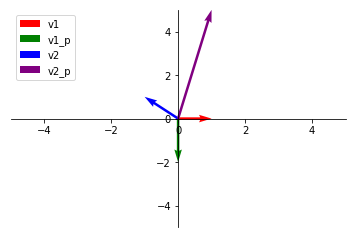

In [36]:
A = np.matrix([[0, 1], [-2, 3]])
A
v1 = np.matrix([[1], [0]])
v2 = np.matrix([[-1], [1]])
v1_p = A * v1
v2_p = A * v2
#print(v1)
#print(v2)
print(v1_p)
print(v2_p)

# Prep data for quiver plot
# soa takes the column vectors we created (using .matrix so we have shape alignment) and flattens them
# note this is a list comprehension
# soa is a lis of ndarrays each with coordinates of origin and the vector "head"
# arguments - starting array, index before which to insert, values to insert
# soa is a list (list comprehension) of arrays (np.insert returns ndarray)
soa = [np.insert(x, 0, [0, 0]) for x in [v1.getA1(), v1_p.getA1(), v2.getA1(), v2_p.getA1()]]
# print(type(soa))
print(soa)
# print(type(soa[0]))
# print(soa[0])


labels = ['v1', 'v1_p', 'v2', 'v2_p']
colors = ['red', 'green', 'blue', 'purple']

# make the plots
plt.figure()
ax = plt.gca()

for i in range(len(soa)): # iterate across each ndarray of orgin, point coordinate
    X, Y, U, V = soa[i]   # takes the values in ndarray and assigns to x, y (origin) and u, v (point coord)
    ax.quiver(X, Y, U, V, angles = 'xy', scale_units = 'xy', scale = 1, color = colors[i], label = labels[i])
                          # this creates each of the arrows, not sure why need to assign to Q? works without!

ax.legend(labels, loc='upper left')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# spine adjustments
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.show();

1. (2) Now compute the eigenvalues and eigenvectors of $\textbf{A}$, then plot $\textbf{A}\vec{v}$ and $\lambda\vec{v}$ on seperate plots, where $\lambda$ is the eigenvalue of $\textbf{A}$.  Comment on your results.
1. (3) How do the results of part (2) differ from part (1)?

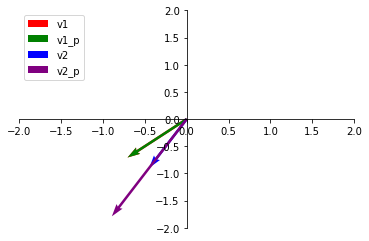

In [48]:
e_val, e_vec = LA.eig(A)
e_val
e_vec

soa = [np.insert(x, 0, [0, 0]) for x in [e_vec.transpose()[0].getA1(), (A@e_vec).transpose()[0].getA1(),
                                         e_vec.transpose()[1].getA1(), (A@e_vec).transpose()[1].getA1()]]
soa

labels = ['v1', 'v1_p', 'v2', 'v2_p']
colors = ['red', 'green', 'blue', 'purple']

# make the plots
plt.figure()
ax = plt.gca()

for i in range(len(soa)): # iterate across each ndarray of orgin, point coordinate
    X, Y, U, V = soa[i]   # takes the values in ndarray and assigns to x, y (origin) and u, v (point coord)
    ax.quiver(X, Y, U, V, angles = 'xy', scale_units = 'xy', scale = 1, color = colors[i], label = labels[i])
                          # this creates each of the arrows, not sure why need to assign to Q? works without!

ax.legend(labels, loc='upper left')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# spine adjustments
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.show();

1. (4) Define a new 3x3 matrix of the form $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the number of eigenvectors in your results?
1. (5) Define a new 3x3 matrix of the form $$\textbf{B} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 1 & 2 & -1 \end{bmatrix}$$ and compute the eigenvalues and vectors.  What can you say about the eigenvalues in your results?  Do they differ from what you saw in part (4)?
1. (6) Compute the inverse of $\textbf{A}$ and $\textbf{B}$ above.  Comment on your results.
1. (7) Compute the determinant of $\textbf{A}$ and $\textbf{B}$.  How might your results relate to the eigen values you computed above?
1. (8) Consider the rotation matrix $$\textbf{R} = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix}$$.  Using a value of $\theta = 90$, compute the inner product of the columns, $\textbf{R}^T$, $\textbf{R}^{-1}$, $det(\textbf{R})$, and the eigenvalues and eigenvectors.  Comment on your results.

## Matrix Decomposition
Matrix Decomposition can be thought of as rewriting a given matrix as a product of other (and often simpler) matrices.  For example, given a matrix $\textbf{A}$, one can decompose $\textbf{A}$ into the following. $$\textbf{A} = \textbf{Q} \Lambda \textbf{Q}^{-1}$$
where $\textbf{Q}$ is a matrix whose *$i^{th}$* column is the *$i^{th}$* eigenvector of $\textbf{A}$, and $\Lambda$ is a matrix containing all of the corresponding eigenvalues on the main diagonal.  Decomposing $\textbf{A}$ in this manner is called an Eigendecomposition.  Such matrix decompositions, form the basis of many techniques in Data Science and other mathematical disciplines.

1. Compute the eigenvalues and eigenvectors of matrix $$\textbf{A} = \begin{bmatrix} -2 & -4 & 2 \\ -2 & 1 & 2 \\ 4 & 2 & 5 \end{bmatrix}$$
1. Construct a matrix $\textbf{Q}$ whose columns are the eigenvectors of $\textbf{A}$.
1. Construct a set of three vectors $\vec{\lambda_1} \dots \vec{\lambda_n}$, whose *$n^{th}$* element is the *$n^{th}$* eigenvalue of $\textbf{A}$ while all other elements are 0.  The second vector, for example, would be $$\vec{\lambda_2} = \begin{bmatrix} 0 \\ \lambda_2 \\ 0 \end{bmatrix}$$
1. Now try multiplying various combinations of $\textbf{A}$, $\textbf{Q}$, and $\vec{\lambda_n}$ together.  What is the relationship among them?
1. Solve the relationship you found in part (4) for $\textbf{A}$ and verify that this is the eigenvalue decomposition.
1. Another very useful matrix decomposition is the Singular Value Decomposition (SVD) which is used, for example, in Principal Component Analysis.  A full discussion of this decomposition is beyond the scope of this exercise, but singular values are the square roots of the eigenvalues of $\textbf{A}\textbf{A}^T$ (for the real case).  Using numpy, perform a SVD on $\textbf{A}$ used above, and verify that the values on the main diagonal of the singular matrix are the square roots of the eigenvalues of $\textbf{A}$.